In [1]:
import seaborn as sns
import cv2
import numpy as np
import matplotlib.pyplot as plt
from src.patching import Patching, Stitching, Annotations, Slide

import xml.etree.ElementTree as ET

In [2]:
classKey = {'GERMINAL CENTRE':1}
classKey = {"GERMINAL CENTRE":1, "SINUS":2}

In [3]:
wsi_path='data/wsi/U_90333_8_B_LOW_8_L1.ndpi'
json_path='data/annotations/U_90333_8_B_LOW_8_L1.json'
xml_path='data/annotations/U_90333_8_B_LOW_8_L1.xml'
#annotations_path='data/asap_annotations.xml'

In [4]:
#ann_obj=Annotations(annotations_path,source='imagej')
ann_obj=Annotations([xml_path,json_path],source=['imagej','Qupath'])
ann_obj.generate_annotations()
#annotations={k-1:v for k,v in annotations.items()}

{'': [[(22625, 11231), (52738, 11231), (52738, 22477), (22625, 22477)]],
 'FOLLICLE': [[(32421, 16720),
   (32448, 16747),
   (32448, 16774),
   (32448, 16800),
   (32475, 16800),
   (32475, 16827),
   (32475, 16854),
   (32475, 16881),
   (32502, 16881),
   (32502, 16935),
   (32529, 16935),
   (32529, 16988),
   (32529, 17042),
   (32529, 17069),
   (32529, 17096),
   (32529, 17123),
   (32529, 17149),
   (32529, 17176),
   (32529, 17203),
   (32529, 17257),
   (32529, 17284),
   (32529, 17337),
   (32529, 17364),
   (32529, 17418),
   (32529, 17445),
   (32529, 17498),
   (32529, 17525),
   (32529, 17579),
   (32529, 17606),
   (32529, 17632),
   (32529, 17659),
   (32529, 17686),
   (32529, 17713),
   (32529, 17740),
   (32529, 17767),
   (32529, 17794),
   (32529, 17820),
   (32529, 17847),
   (32529, 17874),
   (32529, 17901),
   (32502, 17928),
   (32502, 17955),
   (32502, 17981),
   (32475, 18008),
   (32448, 18035),
   (32421, 18062),
   (32394, 18089),
   (32368, 18116),
   

In [5]:
ann_obj.filter_labels(['GC', 'sinus', 'GERMINAL CENTRE', 'SINUS'])
annotations=ann_obj._annotations
#ann_obj.encode_keys()
annotations=ann_obj._annotations

In [11]:
print([len(v) for v in annotations.values()])

[7, 14, 0, 2]


In [6]:
new_annotations={}
new_annotations['germinals']=annotations['GC']+annotations['GERMINAL CENTRE']
new_annotations['sinus']=annotations['sinus']+annotations['SINUS']
new_annotations={i: v for i, v in enumerate(new_annotations.values())}

In [7]:
len(new_annotations[0])

14

In [8]:
wsi=Slide(wsi_path,annotations=new_annotations)

In [9]:
mask=wsi.slide_mask(size=(2000,2000))

[(219, 94, 86), (86, 211, 219)]
[array([[36882, 18569],
       [36882, 18563],
       [36882, 18556],
       [36882, 18549],
       [36869, 18543],
       [36849, 18536],
       [36836, 18536],
       [36829, 18536],
       [36822, 18536],
       [36816, 18536],
       [36809, 18536],
       [36802, 18536],
       [36783, 18536],
       [36769, 18536],
       [36763, 18536],
       [36743, 18536],
       [36736, 18536],
       [36730, 18536],
       [36723, 18536],
       [36710, 18536],
       [36677, 18536],
       [36657, 18536],
       [36637, 18536],
       [36631, 18536],
       [36618, 18536],
       [36611, 18536],
       [36598, 18536],
       [36591, 18536],
       [36591, 18543],
       [36578, 18543],
       [36571, 18549],
       [36565, 18556],
       [36558, 18563],
       [36552, 18569],
       [36545, 18576],
       [36538, 18583],
       [36525, 18589],
       [36525, 18596],
       [36519, 18596],
       [36519, 18602],
       [36505, 18616],
       [36499, 18616],
 

In [9]:
Patching(wsi)

{'name': 'U_90333_8_B_LOW_8_L1.', 'mag': 0, 'size': (256, 256), 'border': None, 'mode': None, 'number': None}

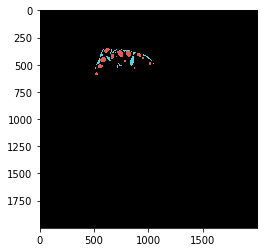

In [10]:
#slide_mask=cv2.resize(slide_mask,(2000,2000))
plt.imshow(mask)

In [13]:
print(wsi.border)

None
